<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.610453,33.645202,-3.912470,70.343186,78.105562,-7.762376
1,0.0,1.0,96.007733,30.353440,8.327512,144.688685,136.805700,7.882984
2,0.0,2.0,90.142659,97.238515,-60.906965,136.474210,182.150429,-45.676220
3,0.0,3.0,20.275375,26.694710,-15.023660,41.946425,63.151031,-21.204607
4,0.0,4.0,49.305585,41.336582,-14.805933,85.836234,101.446916,-15.610683
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.083451,34.233124,13.276879,105.593454,100.676506,4.916948
19996,999.0,16.0,70.843399,43.606892,-41.521381,82.928910,131.605535,-48.676624
19997,999.0,17.0,75.749045,85.997215,-36.161097,135.585163,166.961129,-31.375966
19998,999.0,18.0,52.721178,96.749624,-42.519928,116.950874,150.049261,-33.098387


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.610453,33.645202,-3.912470,70.343186,78.105562,-7.762376
1,0.0,1.0,96.007733,30.353440,8.327512,144.688685,136.805700,7.882984
2,0.0,2.0,90.142659,97.238515,-60.906965,136.474210,182.150429,-45.676220
3,0.0,3.0,20.275375,26.694710,-15.023660,41.946425,63.151031,-21.204607
4,0.0,4.0,49.305585,41.336582,-14.805933,85.836234,101.446916,-15.610683
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.083451,34.233124,13.276879,105.593454,100.676506,4.916948
19996,999.0,16.0,70.843399,43.606892,-41.521381,82.928910,131.605535,-48.676624
19997,999.0,17.0,75.749045,85.997215,-36.161097,135.585163,166.961129,-31.375966
19998,999.0,18.0,52.721178,96.749624,-42.519928,116.950874,150.049261,-33.098387


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    30.610453  33.645202  -3.912470   70.343186   78.105562   
      1.0    96.007733  30.353440   8.327512  144.688685  136.805700   
      2.0    90.142659  97.238515 -60.906965  136.474210  182.150429   
      3.0    20.275375  26.694710 -15.023660   41.946425   63.151031   
      4.0    49.305585  41.336582 -14.805933   85.836234  101.446916   
...                ...        ...        ...         ...         ...   
999.0 15.0   48.083451  34.233124  13.276879  105.593454  100.676506   
      16.0   70.843399  43.606892 -41.521381   82.928910  131.605535   
      17.0   75.749045  85.997215 -36.161097  135.585163  166.961129   
      18.0   52.721178  96.749624 -42.519928  116.950874  150.049261   
      19.0   24.607784  59.850343 -31.566519   62.891608   93.850972   

                 e_hat  
rep   index             
0.0   0.0    -7.762376  
      1.0     7.882984  
      2.0   -45.676220  
      3.0   -21.204607  
      4.0   -15.610683  
...                ...  
999.0 15.0    4.916948  
      16.0  -48.676624  
      17.0  -31.375966  
      18.0  -33.098387  
      19.0  -30.959364  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    30.610453  33.645202  -3.912470   70.343186   78.105562   
      1.0    96.007733  30.353440   8.327512  144.688685  136.805700   
      2.0    90.142659  97.238515 -60.906965  136.474210  182.150429   
      3.0    20.275375  26.694710 -15.023660   41.946425   63.151031   
      4.0    49.305585  41.336582 -14.805933   85.836234  101.446916   
...                ...        ...        ...         ...         ...   
999.0 15.0   48.083451  34.233124  13.276879  105.593454  100.676506   
      16.0   70.843399  43.606892 -41.521381   82.928910  131.605535   
      17.0   75.749045  85.997215 -36.161097  135.585163  166.961129   
      18.0   52.721178  96.749624 -42.519928  116.950874  150.049261   
      19.0   24.607784  59.850343 -31.566519   62.891608   93.850972   

                 e_hat  
rep   index             
0.0   0.0    -7.762376  
      1.0     7.882984  
      2.0   -45.676220  
      3.0   -21.204607  
      4.0   -15.610683  
...                ...  
999.0 15.0    4.916948  
      16.0  -48.676624  
      17.0  -31.375966  
      18.0  -33.098387  
      19.0  -30.959364  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.610453,33.645202,-3.912470,70.343186,78.105562,-7.762376
1,0.0,1.0,96.007733,30.353440,8.327512,144.688685,136.805700,7.882984
2,0.0,2.0,90.142659,97.238515,-60.906965,136.474210,182.150429,-45.676220
3,0.0,3.0,20.275375,26.694710,-15.023660,41.946425,63.151031,-21.204607
4,0.0,4.0,49.305585,41.336582,-14.805933,85.836234,101.446916,-15.610683
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.083451,34.233124,13.276879,105.593454,100.676506,4.916948
19996,999.0,16.0,70.843399,43.606892,-41.521381,82.928910,131.605535,-48.676624
19997,999.0,17.0,75.749045,85.997215,-36.161097,135.585163,166.961129,-31.375966
19998,999.0,18.0,52.721178,96.749624,-42.519928,116.950874,150.049261,-33.098387


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    30.610453  33.645202  -3.912470   70.343186   78.105562   
      1.0    96.007733  30.353440   8.327512  144.688685  136.805700   
      2.0    90.142659  97.238515 -60.906965  136.474210  182.150429   
      3.0    20.275375  26.694710 -15.023660   41.946425   63.151031   
      4.0    49.305585  41.336582 -14.805933   85.836234  101.446916   
...                ...        ...        ...         ...         ...   
999.0 15.0   48.083451  34.233124  13.276879  105.593454  100.676506   
      16.0   70.843399  43.606892 -41.521381   82.928910  131.605535   
      17.0   75.749045  85.997215 -36.161097  135.585163  166.961129   
      18.0   52.721178  96.749624 -42.519928  116.950874  150.049261   
      19.0   24.607784  59.850343 -31.566519   62.891608   93.850972   

                 e_hat  
rep   index             
0.0   0.0    -7.762376  
      1.0     7.882984  
      2.0   -45.676220  
      3.0   -21.204607  
      4.0   -15.610683  
...                ...  
999.0 15.0    4.916948  
      16.0  -48.676624  
      17.0  -31.375966  
      18.0  -33.098387  
      19.0  -30.959364  

[20000 rows x 6 columns]

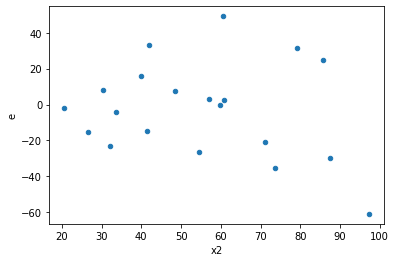

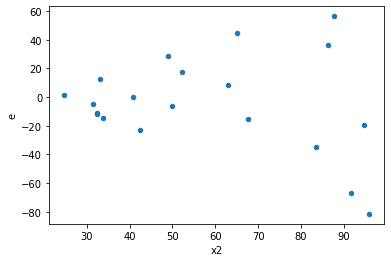

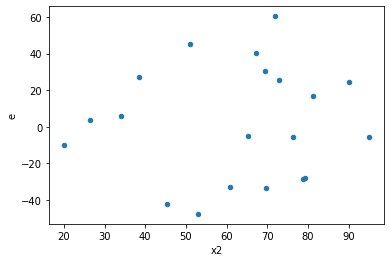

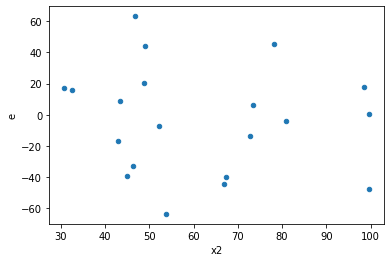

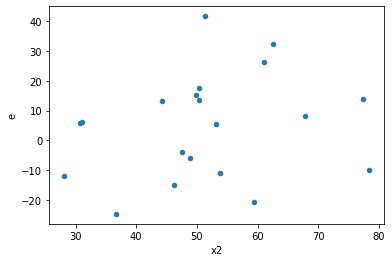

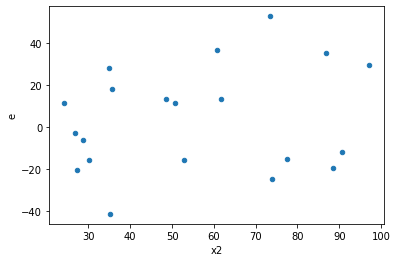

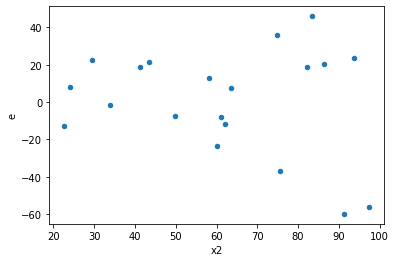

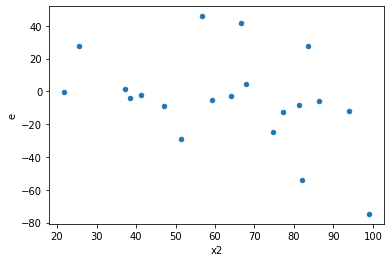

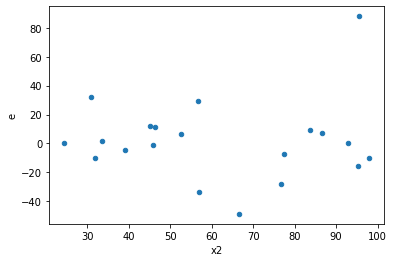

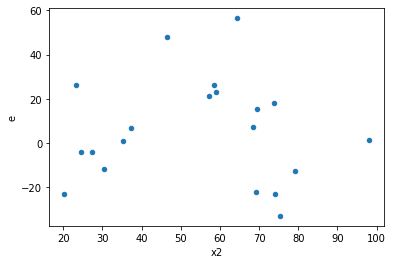

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,1569.0496289847354,9964.350102596927,261.5082714974559,1660.7250170994878,6.350564009275111,0.040640816260754775,0.9796795918696226,0.020320408130377388,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,3301.6475090876984,7951.593010015527,550.2745848479498,1325.2655016692545,2.4083712716542194,0.30890520962693513,0.8455473951865324,0.15445260481346756,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,7164.62127734353,9644.082000529928,1194.1035462239217,1607.3470000883215,1.3460700331819524,0.7274037339831589,0.6362981330084205,0.36370186699157947,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,1018.5970641071907,2887.9006853772503,169.76617735119845,481.3167808962084,2.8351747586358114,0.23034108325128888,0.8848294583743556,0.11517054162564444,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,2529.2592674092407,5622.1231414572185,421.54321123487347,937.0205235762031,2.222833860451185,0.3539040113187728,0.8230479943406136,0.1769520056593864,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,1426.079582032899,8175.128334360747,237.6799303388165,1362.5213890601246,5.732589146748019,0.05180272178986001,0.97409863910507,0.025901360894930003,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,2527.380320979948,6399.882726711021,421.230053496658,1066.6471211185035,2.5322198932963036,0.2829261533860743,0.8585369233069629,0.14146307669303715,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,888.6811693703988,8330.123061393944,148.11352822839982,1388.3538435656574,9.37357890377666,0.015425383133420345,0.9922873084332898,0.0077126915667101725,Reject005=0 : Heteroscedasticity
9.0,6.0,6.0,2153.6495868810766,2536.4350590157205,358.9415978135128,422.73917650262007,1.1777380472971906,0.8476484025833311,0.5761757987083345,0.42382420129166554,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,4767.836078747642,2710.655012612602,794.6393464579404,451.7758354354337,0.5685294057602341,0.5096536279227157,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,1569.0496289847354,9964.350102596927,261.5082714974559,1660.7250170994878,6.350564009275111,0.040640816260754775,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,3301.6475090876984,7951.593010015527,550.2745848479498,1325.2655016692545,2.4083712716542194,0.30890520962693513,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,7164.62127734353,9644.082000529928,1194.1035462239217,1607.3470000883215,1.3460700331819524,0.7274037339831589,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,1018.5970641071907,2887.9006853772503,169.76617735119845,481.3167808962084,2.8351747586358114,0.23034108325128888,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,2529.2592674092407,5622.1231414572185,421.54321123487347,937.0205235762031,2.222833860451185,0.3539040113187728,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,1426.079582032899,8175.128334360747,237.6799303388165,1362.5213890601246,5.732589146748019,0.05180272178986001,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,2527.380320979948,6399.882726711021,421.230053496658,1066.6471211185035,2.5322198932963036,0.2829261533860743,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,888.6811693703988,8330.123061393944,148.11352822839982,1388.3538435656574,9.37357890377666,0.015425383133420345,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      813
Reject005=0 : Heteroscedasticity    187
Name: Result_test, dtype: int64